# Twitter Sentiment Analysis about Coronavirus in Portugal

### Imports

In [1]:
import pandas as pd
from textblob import TextBlob
from googletrans import Translator
from wordcloud import WordCloud
import re


from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tweets = pd.read_csv("../tweets_cleaned.csv")
tweets.head()
pd.set_option('display.max_colwidth', None)

df = tweets[['text']]
df.head()
#obs: ter em conta tweets de contas brasileiras

,text
0,hoje o meu obrigado vai para o excelente trabalho que os jornalistas estao a fazer durante este problema da covid19 na televisao na radio nos jornais no online todos tem contribuido ficaemcasa covid19 coronavirus obrigado visuais upsideup portugal
1,seguimos firmes na quarentena se nos estamos conseguindo voce tambem dara conta de ficar em casa sossega o facho quarentena sossegaofacho coronavirus em quarentena
2,coronavirus tracou ano de 2020 sem nenhuma oposicao
3,a imagem impressionante do telao do aeroporto de lisboa ontem apenas 32 partidas 3 para o brasil em um painel que comporta 125 voos coronavirus coronavirusportugal coronaviruspt covid19
4,nao estou muito preocupado com o coronavirus ja peguei coisa muito pior e ainda chamei de amor


### Preprocessing

In [3]:
stopwords = set(stopwords.words('portuguese') + list(punctuation))

# Function to clean Portuguese text and tokenize it
def preProcessing(text):
    text = text.lower() # convert text to lower-case
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub(r'#([^\s]+)', r'\1', text) # remove the # in #hashtag
    text = word_tokenize(text) # remove repeated characters
    word_list = [word for word in text if word not in stopwords]
    text = ' '.join(word_list)
    return text

    

### Experiment 1 - Translate to EN, use textBlob polarity 

In [4]:
translator = Translator()

# Function to translate the current text to english
def Translation(text):
    if  translator.detect(text) != 'en':
        traducao = translator.translate(text, dest='en')
        return traducao.text
    else:
        return text

# Function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

# Function to get classification
def getClassification(value):
    if value < 0:
        return 'Negative'
    elif value == 0:
        return 'Neutral'
    else:
        return 'Positive'


# Create three new columns 'Text_EN', 'Subjectivity' and 'Polarity'
df['text_clean'] = df['text'].apply(preProcessing)
df['text_en'] = df['text_clean'].apply(Translation)
df['Subjectivity'] = df['text_en'].apply(getSubjectivity)
df['Polarity'] = df['text_en'].apply(getPolarity)
df['Classification'] = df['Polarity'].apply(getClassification)

df


/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/joao/.local/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

,text,text_clean,text_en,Subjectivity,Polarity,Classification
0,hoje o meu obrigado vai para o excelente trabalho que os jornalistas estao a fazer durante este problema da covid19 na televisao na radio nos jornais no online todos tem contribuido ficaemcasa covid19 coronavirus obrigado visuais upsideup portugal,hoje obrigado vai excelente trabalho jornalistas estao fazer durante problema covid19 televisao radio jornais online todos contribuido ficaemcasa covid19 coronavirus obrigado visuais upsideup portugal,today thanks goes excellent job journalists are doing during covid19 problem television radio online newspapers all contributed staysemcasa covid19 coronavirus thanks visuals upsideup portugal,0.466667,0.466667,Positive
1,seguimos firmes na quarentena se nos estamos conseguindo voce tambem dara conta de ficar em casa sossega o facho quarentena sossegaofacho coronavirus em quarentena,seguimos firmes quarentena conseguindo voce tambem dara conta ficar casa sossega facho quarentena sossegaofacho coronavirus quarentena,"we continue firm quarantine, getting you to be able to stay home as well, quiet beam, quarantine, quiet, coronavirus, quarantine",0.422917,0.075000,Positive
2,coronavirus tracou ano de 2020 sem nenhuma oposicao,coronavirus tracou ano 2020 nenhuma oposicao,coronavirus traced year 2020 no opposition,0.000000,0.000000,Neutral
3,a imagem impressionante do telao do aeroporto de lisboa ontem apenas 32 partidas 3 para o brasil em um painel que comporta 125 voos coronavirus coronavirusportugal coronaviruspt covid19,imagem impressionante telao aeroporto lisboa ontem apenas 32 partidas 3 brasil painel comporta 125 voos coronavirus coronavirusportugal coronaviruspt covid19,impressive image telao lisboa airport yesterday only 32 departures 3 brazil panel holds 125 flights coronavirus coronavirusportugal coronaviruspt covid19,1.000000,0.500000,Positive
4,nao estou muito preocupado com o coronavirus ja peguei coisa muito pior e ainda chamei de amor,nao preocupado coronavirus ja peguei coisa pior ainda chamei amor,not worried coronavirus already got worse thing called love,0.600000,0.050000,Positive
...,...,...,...,...,...,...
123,disse o cara que a 2 dias atras postou video do seu show lotado com a legenda nao teve essa de corona virus com certeza esta bem preocupado com a populacao,disse cara 2 dias atras postou video show lotado legenda nao corona virus certeza bem preocupado populacao,said man 2 days ago posted video show crowded caption nao corona virus sure well worried population,0.888889,0.500000,Positive
124,atencao primeira morte confirmada por coronavirus no brasil n consegui tirar foto da noticia mas e real o senhor tinha 63 anos,atencao primeira morte confirmada coronavirus brasil n consegui tirar foto noticia real senhor 63 anos,attention first confirmed death coronavirus brazil i couldn't take photo real news sir 63 years old,0.458333,0.237500,Positive
125,nophuture sera lancado na proxima quinta sobrevivam ao corona virus e serao recompensados,nophuture sera lancado proxima quinta sobrevivam corona virus serao recompensados,nophuture will be released next Thursday survive corona virus will be rewarded,0.000000,0.000000,Neutral
126,cidadaos americanos compram armas para combater o covid2019 quarentena stayhomechallenge coronavirus usarmy usavirus,cidadaos americanos compram armas combater covid2019 quarentena stayhomechallenge coronavirus usarmy usavirus,american citizens buy weapons fight covid2019 quarantine stayhomechallenge coronavirus usarmy usavirus,0.000000,0.000000,Neutral


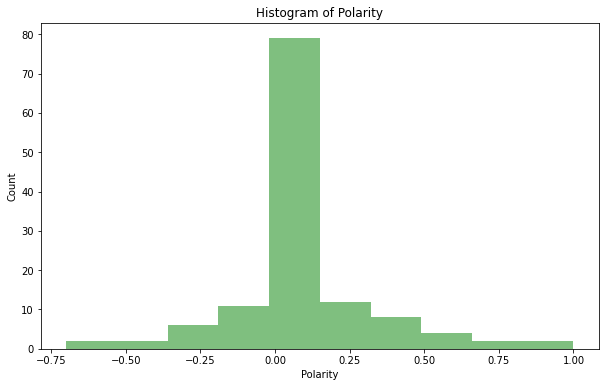

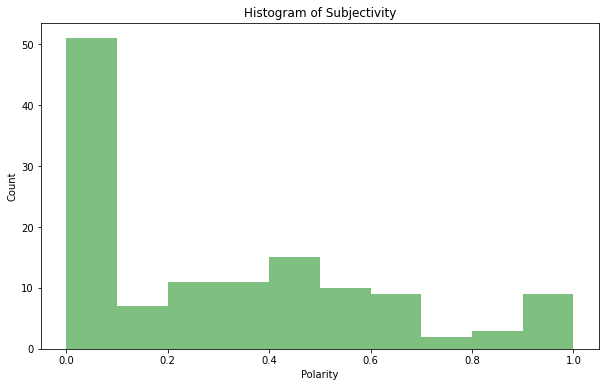

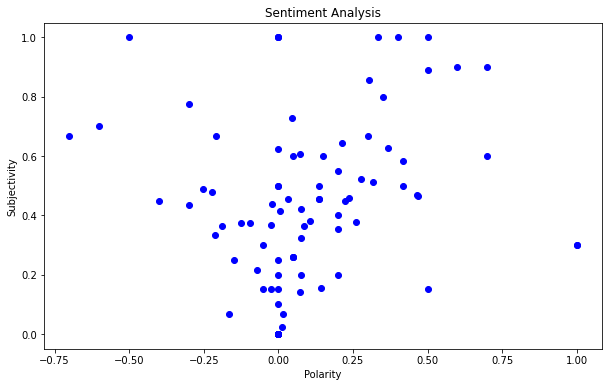

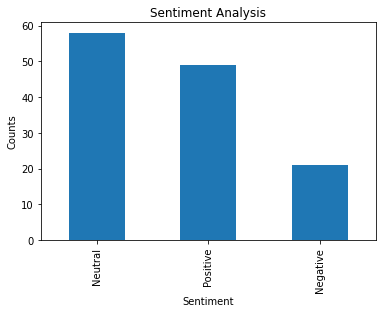

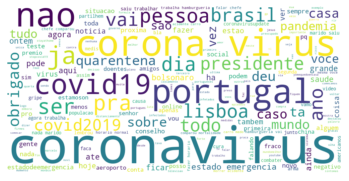

In [6]:
df.describe()

num_bins = 10
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.Polarity, num_bins, facecolor='green', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of Polarity')
plt.show();

plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.Subjectivity, num_bins, facecolor='green', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of Subjectivity')
plt.show();

# Plotting 
plt.figure(figsize=(10,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Classification'].value_counts().plot(kind = 'bar')
plt.show()

# word cloud visualization
allWords = ' '.join([twts for twts in df['text_clean']])
wordCloud = WordCloud(width=1000, height=500, random_state=21, max_font_size=200,background_color="white").generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Further work / Resources

#### Lexicon-based approach 
- Use portuguese lexicons to determine polarity
    - [SentiLex-PT](https://github.com/davidsbatista/REACTION-resources)
    - [SentiLex-PT 02](http://b2find.eudat.eu/dataset/b6bd16c2-a8ab-598f-be41-1e7aeecd60d3)
    - [Corpus Reli](https://www.linguateca.pt/Repositorio/ReLi/#car)
    
#### Machine Learning Based Approach
- Use portuguese tweets database to train and develop a classification model that predicts sentiment
    - [SentiTweets-PT](https://github.com/davidsbatista/REACTION-resources/blob/master/SentiTuites-PT01.zip)
    - [800k Portuguese Tweet Dataset](https://www.kaggle.com/augustop/portuguese-tweets-for-sentiment-analysis)
- [Contact Priberam for their Sentiment Analysis services](https://www.priberam.com/developers/)
- [Textblob guide](https://textblob.readthedocs.io/en/dev/classifiers.html#loading-data-and-creating-a-classifier)


#### Other resources
- Use state-of-the-art tokenizers
    - [Repo](https://github.com/huggingface/tokenizers)
- [Microsoft's NLP Best Practices](https://github.com/Microsoft/nlp-recipes)